In [76]:
!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




# Load Dataset

In [43]:
# Load the dataset
data = pd.read_csv('/content/mobile_usage_behavioral_analysis.csv')


,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York


# Data Analysis

In [ ]:
# Display the first few rows of the dataset
data.head()


In [44]:
# Display last five entries of data

data.tail()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
995,996,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles
996,997,32,Male,9.65,10.51,11,1.02,1.02,3.84,Los Angeles
997,998,46,Female,11.68,10.06,9,2.35,3.13,1.03,Phoenix
998,999,25,Male,3.89,10.78,15,4.00,1.79,1.61,Phoenix
999,1000,22,Female,3.99,7.05,4,0.90,4.98,2.33,Phoenix


In [45]:
# Display random numbers of data

data.sample(10)

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
370,371,23,Male,10.51,7.48,12,0.81,4.31,2.00,Chicago
273,274,58,Male,6.79,1.32,16,4.26,3.78,3.62,Los Angeles
691,692,57,Male,7.22,9.72,25,1.56,0.64,3.53,Houston
315,316,48,Female,1.17,4.94,25,3.09,1.41,0.36,Phoenix
149,150,45,Male,6.28,2.69,9,4.96,3.00,1.17,Houston
800,801,31,Male,3.81,3.26,16,3.88,0.72,3.47,Houston
958,959,34,Female,10.65,4.17,6,1.76,0.47,0.61,Phoenix
154,155,45,Female,7.38,6.77,17,3.30,3.64,0.63,Los Angeles
231,232,45,Female,3.71,1.04,25,1.70,3.15,3.51,Houston
354,355,25,Female,10.04,13.09,9,3.51,0.19,4.33,Chicago


In [3]:
# Check dataset information
data.info()

# Summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Total_App_Usage_Hours         1000 non-null   float64
 4   Daily_Screen_Time_Hours       1000 non-null   float64
 5   Number_of_Apps_Used           1000 non-null   int64  
 6   Social_Media_Usage_Hours      1000 non-null   float64
 7   Productivity_App_Usage_Hours  1000 non-null   float64
 8   Gaming_App_Usage_Hours        1000 non-null   float64
 9   Location                      1000 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 78.2+ KB


,User_ID,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,38.745000,6.405670,7.696310,16.64700,2.456330,2.495270,2.475410
std,288.819436,12.186734,3.134855,3.714187,7.61961,1.439525,1.443392,1.450362
min,1.000000,18.000000,1.000000,1.010000,3.00000,0.000000,0.000000,0.010000
25%,250.750000,28.000000,3.590000,4.530000,10.00000,1.200000,1.282500,1.220000
50%,500.500000,40.000000,6.455000,7.880000,17.00000,2.445000,2.435000,2.455000
75%,750.250000,50.000000,9.122500,10.910000,23.00000,3.672500,3.710000,3.782500
max,1000.000000,59.000000,11.970000,14.000000,29.00000,4.990000,5.000000,5.000000


In [4]:
# Count zero values in each column
zero_counts = (data == 0).sum()
print("Number of zero values in each column:\n", zero_counts)


Number of zero values in each column:
 User_ID                         0
Age                             0
Gender                          0
Total_App_Usage_Hours           0
Daily_Screen_Time_Hours         0
Number_of_Apps_Used             0
Social_Media_Usage_Hours        3
Productivity_App_Usage_Hours    1
Gaming_App_Usage_Hours          0
Location                        0
dtype: int64


In [5]:
# Replace zero values with mean in each column
for column in data.columns:
    if data[column].dtype != 'object':  # Ensures only numeric columns are targeted
        mean_value = data[column][data[column] != 0].mean()
        data[column] = data[column].replace(0, mean_value)


In [52]:
# Show correlation between columns, excluding non-numeric columns

data.corr(numeric_only=True)

,User_ID,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
User_ID,1.000000,-0.028576,-0.010570,0.020941,-0.001214,-0.002608,0.002207,-0.003514
Age,-0.028576,1.000000,-0.003319,-0.017639,-0.002081,-0.008324,0.005848,-0.012969
Total_App_Usage_Hours,-0.010570,-0.003319,1.000000,0.002948,0.041493,0.019330,-0.009983,-0.067770
Daily_Screen_Time_Hours,0.020941,-0.017639,0.002948,1.000000,0.016835,0.031773,0.033206,-0.012984
Number_of_Apps_Used,-0.001214,-0.002081,0.041493,0.016835,1.000000,0.017789,-0.007814,0.019468
Social_Media_Usage_Hours,-0.002608,-0.008324,0.019330,0.031773,0.017789,1.000000,-0.076456,0.006217
Productivity_App_Usage_Hours,0.002207,0.005848,-0.009983,0.033206,-0.007814,-0.076456,1.000000,0.027217
Gaming_App_Usage_Hours,-0.003514,-0.012969,-0.067770,-0.012984,0.019468,0.006217,0.027217,1.000000


# Data Visualization

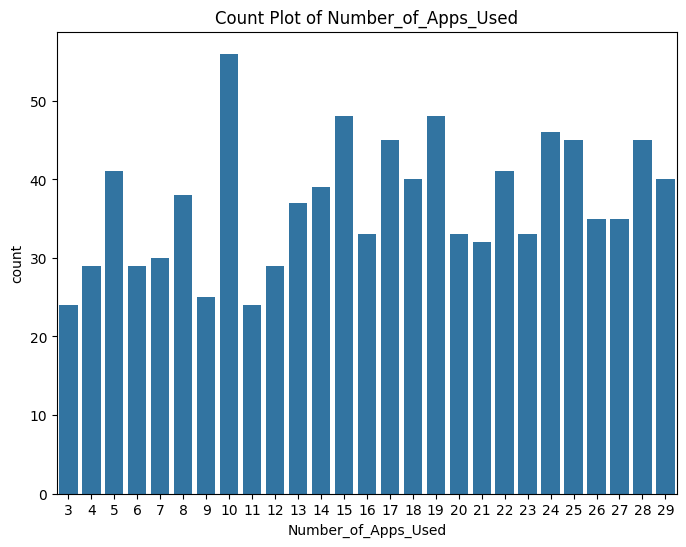

In [69]:
# Example of count plot for the 'User_Type' column
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Number_of_Apps_Used')
plt.title("Count Plot of Number_of_Apps_Used")
plt.xlabel("Number_of_Apps_Used")
plt.ylabel("count")
plt.show()

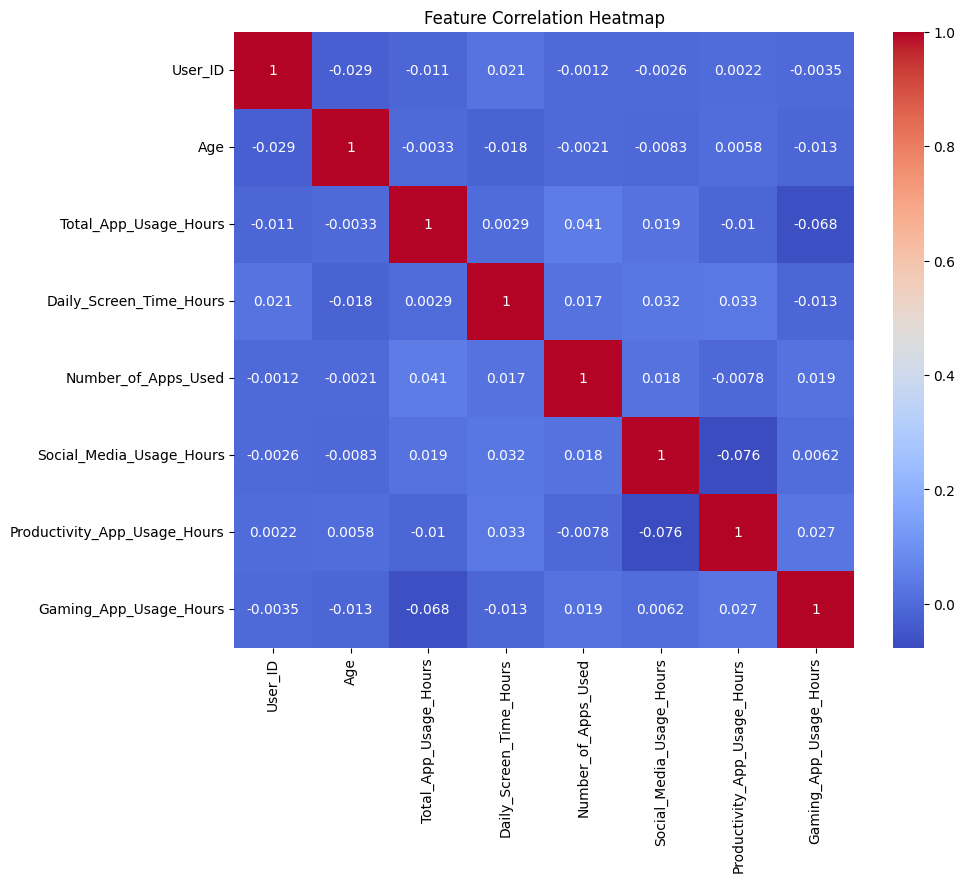

In [54]:
# Correlation heatmap - select only numeric features
numeric_data = data.select_dtypes(include=['number']) # Select only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

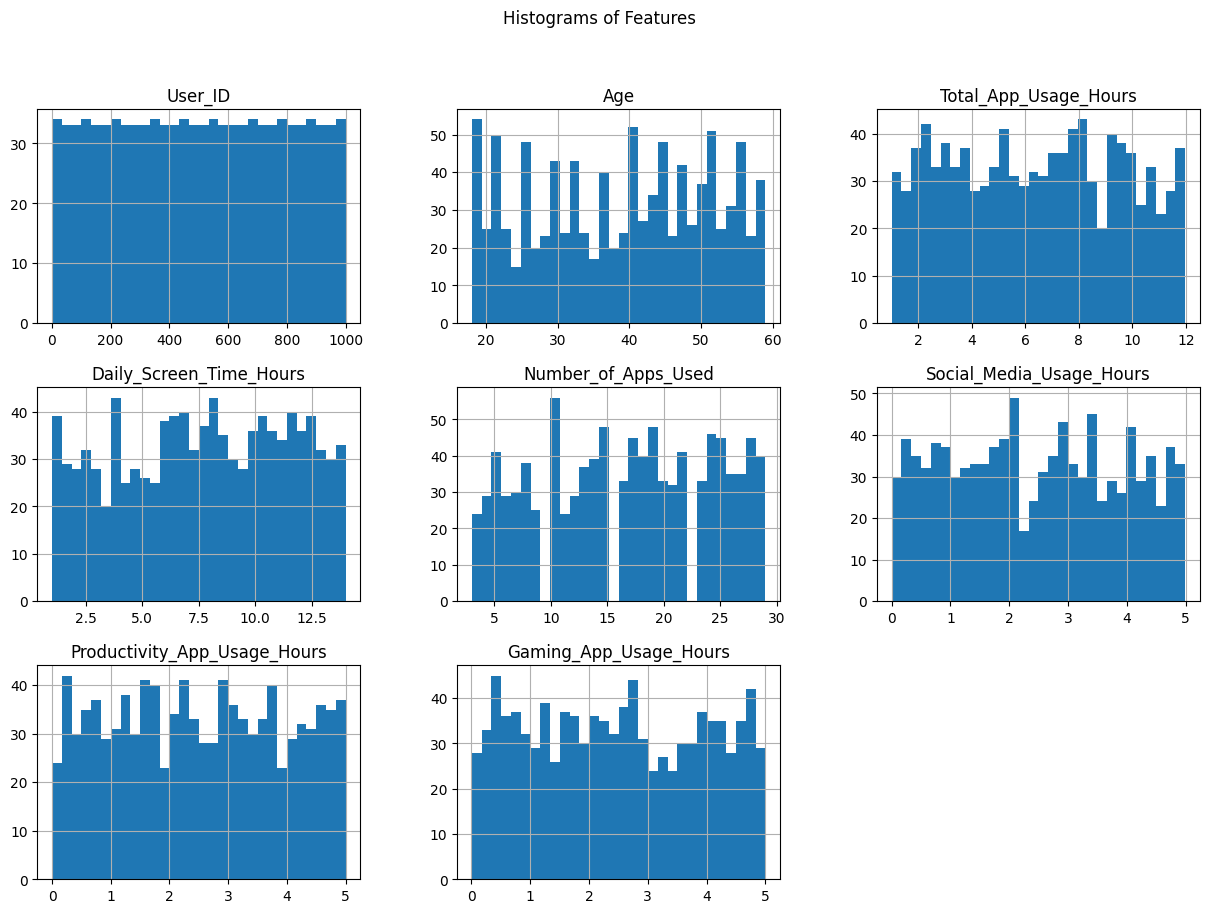

In [55]:
# Distribution of each column
data.hist(bins=30, figsize=(15, 10)) # This line can remain unchanged
plt.suptitle("Histograms of Features")
plt.show()

In [23]:
# Step 1: Define Potential Target Variable (e.g., Heavy vs Light User based on Total_App_Usage_Hours)
data['User_Type'] = np.where(data['Total_App_Usage_Hours'] > data['Total_App_Usage_Hours'].mean(), 'Heavy', 'Light')

In [24]:
# Prepare Features (X) and Target (y)
X = data.drop(['User_ID', 'User_Type'], axis=1)  # Dropping User_ID and target from features
y = data['User_Type']

# Convert categorical columns to numerical (e.g., Gender and Location)
X = pd.get_dummies(X, drop_first=True)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
X_train

,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Gender_Male,Location_Houston,Location_Los Angeles,Location_New York,Location_Phoenix
541,40,9.61,8.84,12,1.97,2.88,0.78,False,False,False,True,False
440,18,9.30,9.62,7,4.05,0.27,0.41,True,False,False,True,False
482,46,5.09,1.79,29,0.40,3.06,1.78,False,True,False,False,False
422,33,3.56,6.91,19,2.38,2.38,1.88,False,False,False,False,True
778,43,8.31,8.14,18,2.30,4.06,1.73,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
106,41,4.43,8.53,12,0.42,4.88,0.07,True,False,True,False,False
270,19,1.96,10.40,22,1.27,3.38,0.94,True,True,False,False,False
860,23,3.31,7.68,10,1.16,0.82,2.39,True,False,True,False,False
435,51,5.25,10.61,24,2.58,2.90,0.15,False,True,False,False,False


In [27]:
X_test

,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Gender_Male,Location_Houston,Location_Los Angeles,Location_New York,Location_Phoenix
521,45,8.25,3.78,29,3.42,4.48,4.44,False,False,False,True,False
737,34,7.18,3.49,26,3.82,4.56,2.03,True,False,False,False,True
740,22,9.49,6.60,15,4.73,0.24,4.09,False,False,False,False,False
660,39,7.62,4.50,26,2.00,3.13,2.47,True,False,False,False,False
411,43,7.67,13.33,10,1.48,0.67,4.41,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
468,52,3.73,12.65,10,2.07,1.44,0.19,False,False,False,False,True
935,38,8.69,6.97,8,1.00,2.48,3.55,False,True,False,False,False
428,50,10.64,1.99,24,0.62,4.63,3.35,False,False,False,False,False
7,40,9.53,8.85,11,2.66,0.28,2.93,True,False,False,False,False


In [28]:
y_train

,User_Type
541,Heavy
440,Heavy
482,Light
422,Light
778,Heavy
...,...
106,Light
270,Light
860,Light
435,Light


In [29]:
y_test

,User_Type
521,Heavy
737,Heavy
740,Heavy
660,Heavy
411,Heavy
...,...
468,Light
935,Heavy
428,Heavy
7,Heavy


In [48]:
# Show correlation between columns

data.corr()

ValueError: could not convert string to float: 'Male'

In [30]:
# Convert categorical columns (e.g., Gender, Location) to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Proceed with train-test split and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Different Classification Algorithms

In [34]:
# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store accuracy scores
accuracy_scores = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")


Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00



Best Model: Random Forest with Accuracy 1.00

Random Forest Accuracy: 100.00%


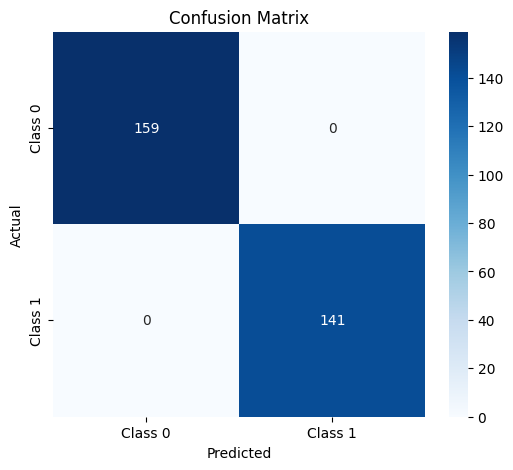


Gradient Boosting Accuracy: 100.00%


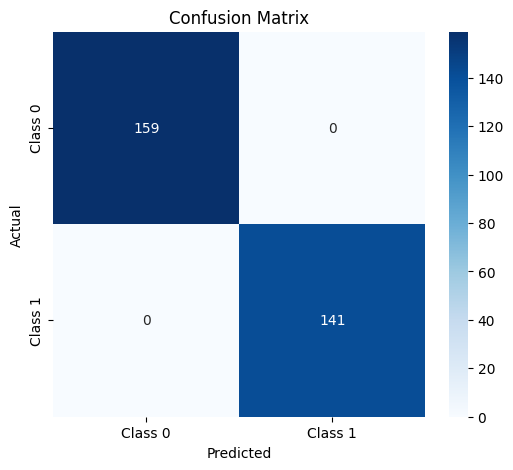

In [77]:
# Select the best model based on accuracy scores
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
print(f"\nBest Model: {best_model_name} with Accuracy {accuracy_scores[best_model_name]:.2f}")
best_model = classifiers[best_model_name]

# Step 10: Predicting Outcome and Evaluating Accuracy
for model_name, model in classifiers.items():  # Assuming 'classifiers' is the correct dictionary
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy * 100:.2f}%")
    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)  # Use y_test here


    # Display confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


# Defining the evaluate_model function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='Heavy')  # Specify pos_label here
    recall = recall_score(y_true, y_pred, pos_label='Heavy')  # Specify pos_label here
    f1 = f1_score(y_true, y_pred, pos_label='Heavy')  # Specify pos_label here
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1_score": f1}